<a href="https://colab.research.google.com/github/PablitoPy/BigDataTP-2/blob/master/TP_Zwei_Part_Eins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Parte 1: Data Fetching***

In [ ]:
import tweepy as tw
import os
import pandas as pd


In [ ]:
# Twitter Api Credentials
consumer_key = 'ogYNVLjPL8ygj4PO6vIyYVxyP'#log["key"][0]
consumer_secret = 'fS8uxKMb2hZ4GOpey1Y6AsbWDeQCIA9srJRetzCo9cAMAM6AbZ'#log["key"][1]
access_token = '175984347-syxFReYiggzkhkr0gz5bKX4Asi5S91eNXKU0iIbV'#log["key"][2]
access_token_secret = '1LhUQr7jCEDxZ0BBQSs9TK2VaXiZq08f2pKMMoBPq1GkJ'#log["key"][3]

In [ ]:
# 
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)


In [ ]:
# Post a tweet from Python
# api.update_status("Look, I'm tweeting from #Python in my #earthanalytics class! @EarthLabCU")
# Your tweet has been posted!

#Our app is read only :Ccccccccccccccccccccccccccccccccccccc

In [ ]:
# Define the search term and the date_since date as variables
search_words = "#Tesla"
date_since = "2021-01-10"


In [110]:
# Collect tweets
tweets = tw.Cursor(api.search, 
                            q=search_words,
                           lang="en",
                           since=date_since).items(500)

tweet_attribute_list = [[tweet.text, tweet.user.screen_name, tweet.created_at, tweet.retweet_count, tweet.favorite_count, tweet.user.location, tweet.user.followers_count] for tweet in tweets]
tweet_attribute_list   


KeyboardInterrupt: ignored

In [111]:
tweets_DataFrame = pd.DataFrame(data=tweet_attribute_list, 
                    columns=['Text','Author', 'Created at', 'Retweet count', 'Favorite count', 'Location', 'Follower count'])
tweets_DataFrame


,Text,Author,Created at,Retweet count,Favorite count,Location,Follower count
0,RT @kanizi7: @elonmusk I think #Tesla develope...,WSPDOGE,2021-06-24 01:24:48,1,0,"Charlotte, NC",208
1,RT @TheTeslaLife: #Tesla #Model3 in California...,drew_bayarea,2021-06-24 01:24:23,89,0,,590
2,RT @DogeMoonSoon: @DogeLoverHodler Did you hea...,DogeLoverHodler,2021-06-24 01:23:33,2,0,"doge Town, Moon",1364
3,I can’t believe I have to charge at such a “sl...,ropo724,2021-06-24 01:23:27,0,1,,295
4,RT @pauljamil: Watch his reaction: I warned hi...,LeoSs09669723,2021-06-24 01:23:07,23,0,,132
...,...,...,...,...,...,...,...
495,RT @JilleAngelEyes: I HATE #Tesla!!!!! Dont ev...,agusnox,2021-06-23 21:21:38,8,0,Not investment advice,1509
496,RT @TheTeslaLife: #Tesla #Model3 in California...,snapped_leg,2021-06-23 21:21:18,89,0,"Rancho Cucamonga, CA",216
497,RT @TheTeslaLife: #Tesla #Model3 in California...,stephenpallotta,2021-06-23 21:21:09,89,0,"New York, USA",1594
498,#Nasdaq closed at a record high for the second...,Forbes_MENA_,2021-06-23 21:18:40,1,1,"309,B No 4, Emaar Busines Park",4387


In [114]:
from google.colab import files
tweets_DataFrame.to_csv('Tweets_with_attributes.csv') 
files.download('Tweets_with_attributes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ***Parte 2: Data Analysis***

In [115]:
data_to_load = files.upload ()

Saving Tweets_with_attributes.csv to Tweets_with_attributes (2).csv


In [116]:
import io
tweet_DataFrame = pd.read_csv(io.BytesIO(data_to_load['Tweets_with_attributes.csv']))

tweet_DataFrame

,Unnamed: 0,Text,Author,Created at,Retweet count,Favorite count,Location,Follower count
0,0,RT @kanizi7: @elonmusk I think #Tesla develope...,WSPDOGE,2021-06-24 01:24:48,1,0,"Charlotte, NC",208
1,1,RT @TheTeslaLife: #Tesla #Model3 in California...,drew_bayarea,2021-06-24 01:24:23,89,0,NaN,590
2,2,RT @DogeMoonSoon: @DogeLoverHodler Did you hea...,DogeLoverHodler,2021-06-24 01:23:33,2,0,"doge Town, Moon",1364
3,3,I can’t believe I have to charge at such a “sl...,ropo724,2021-06-24 01:23:27,0,1,NaN,295
4,4,RT @pauljamil: Watch his reaction: I warned hi...,LeoSs09669723,2021-06-24 01:23:07,23,0,NaN,132
...,...,...,...,...,...,...,...,...
495,495,RT @JilleAngelEyes: I HATE #Tesla!!!!! Dont ev...,agusnox,2021-06-23 21:21:38,8,0,Not investment advice,1509
496,496,RT @TheTeslaLife: #Tesla #Model3 in California...,snapped_leg,2021-06-23 21:21:18,89,0,"Rancho Cucamonga, CA",216
497,497,RT @TheTeslaLife: #Tesla #Model3 in California...,stephenpallotta,2021-06-23 21:21:09,89,0,"New York, USA",1594
498,498,#Nasdaq closed at a record high for the second...,Forbes_MENA_,2021-06-23 21:18:40,1,1,"309,B No 4, Emaar Busines Park",4387


In [117]:

import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import nltk
nltk.download("popular")
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [118]:
#Limpieza de Datos #1: remover arrobas (@)
import numpy as np
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text# We are keeping cleaned tweets in a new column called 'tidy_tweets'
tweet_DataFrame['tidy_tweets'] = np.vectorize(remove_pattern)(tweet_DataFrame['Text'], "@[\w]*: | *RT*")

In [119]:
#Limpieza de Datos #2: remover links
cleaned_tweets = []

for index, row in tweet_DataFrame.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.tidy_tweets.split()        if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

tweet_DataFrame['tidy_tweets'] = cleaned_tweets

In [120]:
#Limpieza de Datos #3: remover filas duplicadas
tweet_DataFrame.drop_duplicates(subset=['tidy_tweets'], keep=False)

,Unnamed: 0,Text,Author,Created at,Retweet count,Favorite count,Location,Follower count,tidy_tweets
3,3,I can’t believe I have to charge at such a “sl...,ropo724,2021-06-24 01:23:27,0,1,NaN,295,I can’t believe I have to charge at such a “sl...
5,5,Might not be breaking news but letters have go...,thecattery,2021-06-24 01:23:03,0,0,"Geelong, Victoria, Australia",1097,Might not be breaking news but letters have go...
6,6,How Not To Take Things Personally – Closing Sa...,CarSharker,2021-06-24 01:22:03,0,0,"Florida, USA",333,How Not To Take Things Personally – Closing Sa...
7,7,Probably bad news for Q2. #Tesla https://t.co/...,fredjessup,2021-06-24 01:21:52,0,1,"Moscow, Idaho",156,Probably bad news for Q2. #Tesla
8,8,@elonmusk I wanna buy my first #Tesla through ...,MoshrefShabir,2021-06-24 01:20:01,0,1,"New York, USA",26,@elonmusk I wanna buy my first #Tesla through ...
...,...,...,...,...,...,...,...,...,...
485,485,@DaCryptoMonkey Legend! Welcome to the #ELONGA...,MarcoRide4life,2021-06-23 21:25:21,9,13,Australia,15,@DaCryptoMonkey Legend! Welcome to the #ELONGA...
487,487,RT @tim_zaman: At #Tesla Autopilot we are bri...,princedoge8888,2021-06-23 21:24:43,449,0,NaN,221,At #Tesla Autopilot we are bringing up our 3rd...
490,490,RT @CryptoToyz: I tried out the Tesla theater!...,vivvchy,2021-06-23 21:22:57,36,0,❤️/Special,869,I tried out the Tesla theater! Not too shabby ...
491,491,RT @DIEBO37: Tesla Shows Off Its Brand New AI-...,ebercheto,2021-06-23 21:22:28,37,0,MI CIUDAD DE CONTRASTES MMM,14348,Tesla Shows Off Its Brand New AI-Training Supe...


In [121]:
#Limpieza de Datos #4: remover puntuaciones, números y caracteres especiales
tweet_DataFrame['absolute_tidy_tweets'] = tweet_DataFrame['tidy_tweets'].str.replace("[^a-zA-Z# ]", "")

In [122]:
#Limpieza de Datos #5: remover palabras de parada
stopwords_set = set(stopwords.words("english"))
cleaned_tweets = []

for index, row in tweet_DataFrame.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.absolute_tidy_tweets.split() if not word in stopwords_set]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))

tweet_DataFrame['absolute_tidy_tweets'] = cleaned_tweets

In [123]:
#Limpieza de Datos #6: tokenización y lematización
# Tokenization
tokenized_tweet = tweet_DataFrame['absolute_tidy_tweets'].apply(lambda x: x.split())

# Finding Lemma for each word
word_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])

#joining words into sentences (from where they came from)
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

tweet_DataFrame['absolute_tidy_tweets'] = tokenized_tweet

In [124]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweet_DataFrame['absolute_tidy_tweets']]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.2,
 TextBlob("elonmusk I think #Tesla developer ready activate #dogecoin payment"))

In [125]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]


[0.2, 'elonmusk I think #Tesla developer ready activate #dogecoin payment']

In [126]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()


,polarity,tweet
0,0.200000,elonmusk I think #Tesla developer ready activa...
1,-0.300000,#Tesla #Model Californias San Bernardino Mount...
2,0.136364,DogeLoverHodler Did hear NASA perseverance rov...
3,-0.300000,I cant believe I charge slow rate travjax ShyC...
4,0.200000,Watch reaction I warned fastest car world He d...


In [127]:
sentiment_df.to_csv('Polarity_analysis.csv') 
files.download('Polarity_analysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [128]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

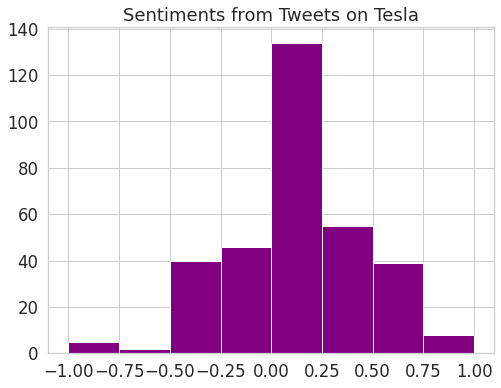

In [129]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Tesla")
plt.show()

In [130]:
#Encontramos promedio de la polidaridad
total_mean = sentiment_df["polarity"].mean()
print(total_mean)


0.13438626750936775


In [130]:
#The End! Thanks Abel :D